## Linear algebra review: eigenanalysis

#### *09 September 2019*
#### *DATA 1010*

In this notebook, we continue our study of linear algebra by exploring eigenanalysis and the singular value decomposition. These tools provide powerful conceptual insight and undergird a variety of critical computational techniques. 


In [1]:
using LinearAlgebra, Plots

### Problem 1

An **eigenvector** of a matrix $A$ is a vector $\mathbf{x}$ satisfying the equation $A\mathbf{x} = \lambda \mathbf{x}$ for some $\lambda \in \mathbb{R}$. If $\lambda \neq 0$, this is the same as saying that $\mathbf{x}$ points along the same line as $A \mathbf{x}$. In this exercise, we will conduct a visual eigenvector exploration for $2 \times 2$ matrices. 

Visit https://shadanan.github.io/MatVis/ and set the matrix to $\begin{bmatrix}
    4 & 1 \\
    1 & 4
  \end{bmatrix}$. 
  
**(a)** Look for the eigenvectors of this matrix *visually* as you manipulate the slider. That is, look for vectors (with tails at the origin) that are not being turned at all by the matrix. Turn on the "show eigenvectors" checkbox to check your answer and verify using Julia.

**(b)** Repeat this exercise with $\begin{bmatrix}
  -2 & 1 \\
  -1 & 2
\end{bmatrix}$ and $\begin{bmatrix}
  2 & 1 \\
  -2 & 2
\end{bmatrix}$. 

*Solution*.

### Problem 2

In class on September 4, we computationally investigated the following result:

*Consider a symmetric $n \times n$ matrix $A$, and define $\mathbf{v}_0 = [1,0,\ldots,0] \in \mathbb{R}^n$. For $k \geq 0$, define $\mathbf{v}_{k+1} = \frac{A\mathbf{v}_{k}}{|A\mathbf{v}_{k}|}$. Then as $k\to\infty$, $\mathbf{v}_k$ converges to the eigenvector with the eigenvalue which is largest in absolute value (assuming that there is a unique eigenvector of $A$ with largest eigenvalue, and assuming that $\mathbf{v}_0$ has a nonzero component with respect to that eigenvector).*

Here we begin with the simple idea "start somewhere and iteratively apply $A$", and we end up with eigenanalysis coming into the picture. This provides a glimpse into how eigenvectors are central to applied linear algebra. 

Explain why the result above holds.

*Solution*. If we expand $\mathbf{v}_0$ as $\mathbf{v}_0 = c_1 \mathbf{u}_1 + \cdots + c_n \mathbf{u}_n$, where $\{\mathbf{u}_1, \ldots, \mathbf{u}_n\}$ is a basis of $\mathbf{R}^n$ consisting of eigenvectors of $A$, then we have 
$$
\frac{A^k \mathbf{v}_0}{|A^k\mathbf{v}_0|} = \frac{c_1 \lambda_1^k \mathbf{u}_1 + \cdots + c_n \lambda_n^k \mathbf{u}_n}{|c_1 \lambda_1^k \mathbf{u}_1 + \cdots + c_n \lambda_n^k \mathbf{u}_n|}
$$
Multiplying numerator and denominator by $\lambda_1^{-k}$ (assuming $\lambda_1$ is the largest eigenvalue in absolute value), we get that the above expression converges to $\mathbf{u}_1/|\mathbf{u}_1|$ as $k\to\infty$. 

### Problem 3
The *singular value decomposition* is closely related to eigenanalysis. The story goes like this:  

(1) If $A$ is an $m\times n$ matrix, then $A$ might not have an eigendecomposition.  
(2) However, $A'A$ is symmetric and positive definite, so it has an orthogonal eigendecomposition.  
(3) Furthermore, $A = R\sqrt{A'A}$ for some rotation/reflection matrix $R$. So $A$ is *kind of* the same as $\sqrt{A'A}$. This analogous to how if $x$ is a real number, then $x = \sigma \sqrt{x^2}$ where $\sigma = 1$ or $-1$.  
(4) Eigendecomposing $\sqrt{A'A}$ gives an equation of the form $A = U\Sigma V'$, where $U$ and $V$ are rotation/reflection matrices (that is, orthogonal matrices). So $A$'s distortion of space is captured by the diagonal matrix $\Sigma$. 

Use the code cell below to explore the relationship between $A$ and $\sqrt{A'A}$ for several matrices $A$.

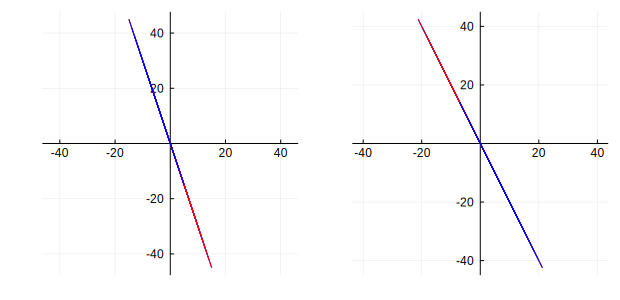

In [47]:
gr(size=(620,300))
function viz(A,n=5)
    p = plot(;legend=false, aspect_ratio = :equal, frame=:origin)
    for i=-n:n
        a,b = A*[i,-n]
        c,d = A*[i,n]
        plot!(p,[(a,b),(c,d)], color=:blue)
        e,f = A*[-n,i]
        g,h = A*[n,i]
        plot!(p,[(e,f),(g,h)], color=:red)
    end
    p
end

A = [-1 2; 3 -6]

plot(viz(A), viz(sqrt(A'*A)))

### Problem 4
In a first linear algebra course, one often learns to find the null space of a matrix using by-hand row reduction to solve the corresponding linear system. In Julia, you can find the null space of a matrix using `nullspace`. Try some small matrices (including some with nontrivial null spaces) and check that this function behaves as expected.

In a first linear algebra course, one often learns to find a basis for span of the columns of a matrix using by-hand row reduction to solve a linear system. In Julia, you can find such a basis by selecting the first $k$ columns from the $U$ factor in the SVD, where $k$ is the rank of the matrix (which can be calculated using `rank`). Try some small matrices and check that this algorithm behaves as expected.

*Bonus: check out how Julia's [standard library](https://github.com/JuliaLang/julia/blob/master/stdlib/LinearAlgebra/src/dense.jl) implements `nullspace`.*

In [41]:
A = [1 1 1
     1 1 1
     1 1 1]

nullspace(A)

3×2 Array{Float64,2}:
  0.0        0.816497
 -0.707107  -0.408248
  0.707107  -0.408248

In [42]:
U, Σ, V = svd(A)
k = rank(A)
U[:,1:k]

3×1 Array{Float64,2}:
 -0.5773502691896255
 -0.5773502691896256
 -0.5773502691896256

---

#### Problem 5
Consider the matrix 

```julia
A = [3 4
     2 1
     1 3 
     2 5 
     6 3]
```
which encodes the locations of five points in the first quadrant 
(each row contains the coordinates of a point).

In this problem we will find the line $\ell$ through the origin
which minimizes the sum of the squares of the distances from the
five points to $\ell$.


* Draw the points and make your best guess at the optimal line
    $\ell$ (just eyeball it). 
* Consider the vector $\mathbf{u}$ which extends from the origin
    to the point on $\ell$ which is in the first quadrant and is one
    unit from the origin. Show that the squared distance from any point
    $\mathbf{a} \in \mathbb{R}^2$ to $\ell$ is
    $|\mathbf{a}|^2 - (\mathbf{a}\cdot \mathbf{v})^2$.
* Show that the unit vector $\mathbf{u}$ which minimizes the sum
    of squared distances from the given points to $\ell$ is equal to
    the vector $\mathbf{v}$ which maximizes $|A\mathbf{v}|^2$.
* Find the value of $\mathbf{v}$ which maximizes $|A
    \mathbf{v}|^2$ by writing $\mathbf{v} =
    [\cos\theta,\sin\theta]$ and maximizing the single-variable
    function $|A[\cos\theta,\sin\theta]|^2$. To help you get started: 
        
    ```julia
    using Optim
    f(θ) = ...
    optimize(f,0,π/2) # _minimizes_ f over [0,π/2]
    ```

* How close was your guess from (a)?   
* Use the SVD to figure out another way to find the vector unit vector that maximizes $|A\mathbf{v}|^2$. 

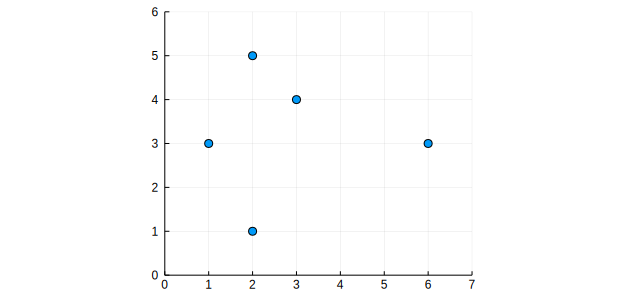

In [48]:
A = [3 4
     2 1
     1 3 
     2 5 
     6 3]

scatter(A[:,1], A[:,2], xlims = (0,7), ylims = (0,6), aspect_ratio = :equal, legend = false)

### Problem 6 

Consider a collection of 165 human faces, in the form of 
  $231 \text{ pixel} \times 195 \text{ pixel}$ grayscale images. If
  we regard each of these images as a vector in $\mathbb{R}^{45045}$ (by
  concatenating columns of each image), then the list of face images
  spans a 165-dimensional subspace of $\mathbb{R}^{45045}$.

  Let $A$ be the $45045 \times 165$ matrix whose columns are the image
  vectors in the collection. Use the associated Jupyter notebook to
  view the first column of $U$ in the SVD $U\Sigma V'$ (rendered as a
  $231 \times 195$ grayscale image). Look at the second and third
  eigenvectors as well.

  Show that each face in the collection can be recognizably
  reconstructed as a projection onto the span of the first several
  columns of $U$.
  
  (Note: this exercise is split into a separate notebook in the `eigenfaces` directory.)